## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Movie Studio Strategy Analysis


## Business Understanding
Overview

This project is designed to aid a company's venture into the movie production industry by launching a new studio. Through comprehensive data analysis, the project will identify current trends and provide actionable insights from box office data. This information will guide the company in determining the types of movies that are most successful in today’s market, thereby supporting strategic content creation and maximizing box office returns

The Problem Statement

The company needs to pinpoint what types of movies are most successful in the current market to propel the new studio's launch. Specifically, we aim to:

1.Identify the genre with the highest profitability(Genres vs ROI,gross,budget)

2.Analyze the relationship between production scale and profitability(Budget vs ROI,gross)

3.Evaluate the impact of release timing on movie financial success(Release Quarter vs ROI)

4.Explore how movie legnth impact profitability(Runtime vs ROI)

In [76]:
# Your code here - remember to use markdown cells for comments as well!

#import everything we need
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import os
import zipfile

%matplotlib inline


### Extracting the imdb file

In [77]:
# Extracting the zipped imdb file
import zipfile

zip_file_path =  "./zippedData/im.db.zip"
extracted_dir = 'unzipped/imdb_db'
db_file_path = os.path.join(extracted_dir, 'im.db')

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
    print(f"Successfully extracted {len(zip_ref.namelist())} file(s) to {extracted_dir}")

Successfully extracted 1 file(s) to unzipped/imdb_db


In [78]:
# Connect to SQLite database
conn= sqlite3.connect(db_file_path)

# List tables
tables = pd.read_sql("""
                     SELECT name
                     FROM sqlite_master
                     WHERE type='table';
                     """, conn)
print("Tables in the IMDb database:")
print(tables)

Tables in the IMDb database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [79]:
gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [80]:
budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budget_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


merge the the data on budget and gross based on the name

In [81]:
# using nicole's Clever trick in ensuring the names in gross and budget 
# are the same
gross_df['title_key'] = gross_df['title'].str.lower().str.strip().str.replace(r'[^a-z0-9 ]', '', regex=True)
budget_df['title_key'] = budget_df['movie'].str.lower().str.strip().str.strip().replace(r'[^a-z0-9 ]', '', regex=True)

In [82]:
merged_df = pd.merge(budget_df,gross_df,on='title_key', how='inner')
merged_df.head(10)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title_key,title,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",pirates of the caribbean on stranger tides,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",avengers age of ultron,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",avengers infinity war,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",justice league,Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",spectre,Spectre,Sony,200100000.0,680600000,2015
5,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",the dark knight rises,The Dark Knight Rises,WB,448100000.0,636800000,2012
6,12,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",solo a star wars story,Solo: A Star Wars Story,BV,213800000.0,179200000,2018
7,13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",the lone ranger,The Lone Ranger,BV,89300000.0,171200000,2013
8,14,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100",john carter,John Carter,BV,73100000.0,211100000,2012
9,15,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240",tangled,Tangled,BV,200800000.0,391000000,2010


now we have a tittle key that ensures that the names in gross that are also in budget would match

In [83]:
# so another one of Nicoles tricks which is very necessary
# we need to convert the production budget and domestic gross and worldwide values 
# from a string to values so that we can work on. We could use our imagination but since
# regex is available lets use that
for col in ['production_budget', 'domestic_gross_y','domestic_gross_x', 'worldwide_gross', 'domestic_gross']:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].replace('[\$,]', '',regex=True).astype(float)

merged_df.info

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_6625/3187848102.py:7: SyntaxWarning: invalid escape sequence '\$'
  merged_df[col] = merged_df[col].replace('[\$,]', '',regex=True).astype(float)


<bound method DataFrame.info of       id  release_date                                        movie  \
0      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
1      4   May 1, 2015                      Avengers: Age of Ultron   
2      7  Apr 27, 2018                       Avengers: Infinity War   
3      9  Nov 17, 2017                               Justice League   
4     10   Nov 6, 2015                                      Spectre   
...   ..           ...                                          ...   
1329  68  Apr 27, 2012                            Sound of My Voice   
1330  73  Jun 15, 2012                         Your Sister's Sister   
1331  80  Jul 10, 2015                                  The Gallows   
1332  86   Jul 7, 2017                                A Ghost Story   
1333  18  Nov 12, 2010                               Tiny Furniture   

      production_budget  domestic_gross_x  worldwide_gross  \
0           410600000.0       241063875.0     1.04566

In [84]:
merged_df['domestic_gross_x'].head()

0    241063875.0
1    459005868.0
2    678815482.0
3    229024295.0
4    200074175.0
Name: domestic_gross_x, dtype: float64

In [85]:
print("merged_df has a shape of :", merged_df.shape)
merged_df.isna().sum()

merged_df has a shape of : (1334, 12)


id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross_x       0
worldwide_gross        0
title_key              0
title                  0
studio                 1
domestic_gross_y       2
foreign_gross        173
year                   0
dtype: int64

#### movie investment science
### computing profit and RIO ( return On Investment)


In [86]:
# profit
merged_df['profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']
merged_df['roi'] = merged_df['profit'] / merged_df['production_budget']

In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1334 non-null   int64  
 1   release_date       1334 non-null   object 
 2   movie              1334 non-null   object 
 3   production_budget  1334 non-null   float64
 4   domestic_gross_x   1334 non-null   float64
 5   worldwide_gross    1334 non-null   float64
 6   title_key          1334 non-null   object 
 7   title              1334 non-null   object 
 8   studio             1333 non-null   object 
 9   domestic_gross_y   1332 non-null   float64
 10  foreign_gross      1161 non-null   object 
 11  year               1334 non-null   int64  
 12  profit             1334 non-null   float64
 13  roi                1334 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 146.0+ KB


In [88]:
# clean the release dates
merged_df['release_date'] = merged_df['release_date'].astype(str).str.strip()
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# get the year and month
merged_df['release_year'] = merged_df['release_date'].dt.year
merged_df['release_month'] = merged_df['release_date'].dt.month

# we have a dataframe with so many colums we have to specify the ones we want
merged_df[['title_key','release_date', 'release_month']]

,title_key,release_date,release_month
0,pirates of the caribbean on stranger tides,2011-05-20,5.0
1,avengers age of ultron,2015-05-01,5.0
2,avengers infinity war,NaT,NaN
3,justice league,NaT,NaN
4,spectre,NaT,NaN
...,...,...,...
1329,sound of my voice,NaT,NaN
1330,your sisters sister,NaT,NaN
1331,the gallows,NaT,NaN
1332,a ghost story,NaT,NaN


# ************************************************************
loosing too much info work together as group to understand why this infor is lost

#### group members lets disect this it runs in nicoles note book but looses alot of info here

### Most profitable movies

Nice visualization from Nicoles Notebook

In [89]:
top_profit = merged_df.nlargest(10,'profit')[['title_key','profit']]
top_profit.head(10)

,title_key,profit
2,avengers infinity war,1.748134e+09
21,jurassic world,1.433855e+09
42,furious 7,1.328723e+09
24,black panther,1.148258e+09
69,jurassic world fallen kingdom,1.135773e+09
96,frozen,1.122470e+09
267,minions,1.086336e+09
1,avengers age of ultron,1.072414e+09
25,incredibles 2,1.042521e+09
29,iron man 3,1.015392e+09


/tmp/ipykernel_6625/3128842419.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit,x='profit',y='title_key',palette='cool')


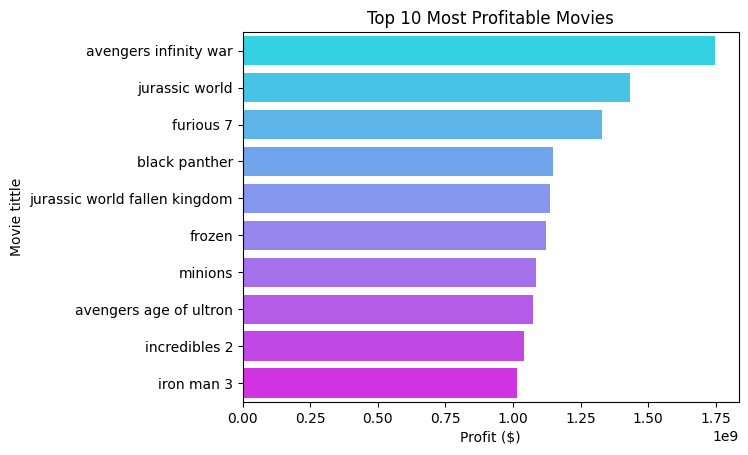

In [90]:
sns.barplot(data=top_profit,x='profit',y='title_key',palette='cool')
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit ($)')
plt.ylabel('Movie tittle')
plt.show()

## Correlation Between Budget and Worlwide Gross

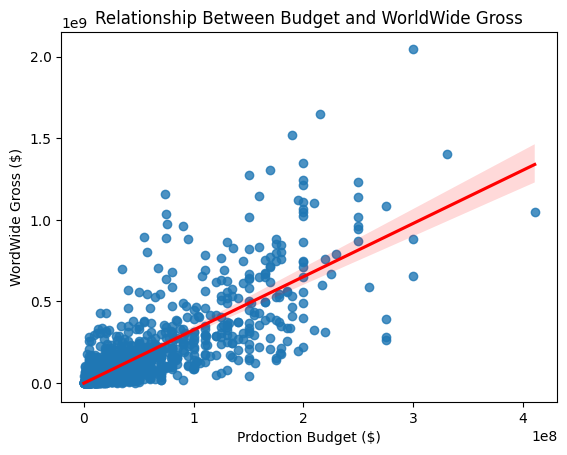

In [91]:
correlation = merged_df[['production_budget','worldwide_gross']]

sns.regplot(data=correlation,x='production_budget',y='worldwide_gross',line_kws={'color':'red'})
plt.title('Relationship Between Budget and WorldWide Gross')
plt.xlabel('Prdoction Budget ($)')
plt.ylabel('WordWide Gross ($)')
plt.show()

The regression line show that thier is a possitive correlation between budget and the worldwide gross since the line has a positive gradient.
In Short the more you spend the more you make and if you don't , your extremely unlucky since statistics in not on your side

The correlation coeeficient quantifies how closely related production budgets are to worldwide revenue.
A strong positive correlation suggests that larger budgets generally lead to higher box office returns 
The scatterplot indicates a positive correlation of 0.78

In [92]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1334 non-null   int64         
 1   release_date       92 non-null     datetime64[ns]
 2   movie              1334 non-null   object        
 3   production_budget  1334 non-null   float64       
 4   domestic_gross_x   1334 non-null   float64       
 5   worldwide_gross    1334 non-null   float64       
 6   title_key          1334 non-null   object        
 7   title              1334 non-null   object        
 8   studio             1333 non-null   object        
 9   domestic_gross_y   1332 non-null   float64       
 10  foreign_gross      1161 non-null   object        
 11  year               1334 non-null   int64         
 12  profit             1334 non-null   float64       
 13  roi                1334 non-null   float64       
 14  release_

,id,release_date,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,year,profit,roi,release_year,release_month
count,1334.000000,92,1.334000e+03,1.334000e+03,1.334000e+03,1.332000e+03,1334.000000,1.334000e+03,1334.000000,92.000000,92.0
mean,50.694903,2013-09-16 17:28:41.739130368,4.707920e+07,6.065140e+07,1.516429e+08,6.067320e+07,2013.586957,1.045637e+08,3.334160,2013.336957,5.0
min,1.000000,2010-05-07 00:00:00,5.000000e+04,0.000000e+00,0.000000e+00,8.000000e+02,2010.000000,-1.104502e+08,-1.000000,2010.000000,5.0
25%,27.000000,2011-05-13 00:00:00,1.000000e+07,7.648586e+06,1.846598e+07,7.700000e+06,2011.000000,1.938556e+06,0.147584,2011.000000,5.0
50%,51.000000,2013-05-31 00:00:00,2.600000e+07,3.291864e+07,6.518342e+07,3.305000e+07,2013.000000,3.208172e+07,1.437637,2013.000000,5.0
75%,74.000000,2015-05-29 00:00:00,6.000000e+07,7.557126e+07,1.726304e+08,7.460000e+07,2016.000000,1.200160e+08,3.303643,2015.000000,5.0
max,100.000000,2018-05-25 00:00:00,4.106000e+08,7.000596e+08,2.048134e+09,7.001000e+08,2018.000000,1.748134e+09,415.564740,2018.000000,5.0
std,28.201701,NaN,5.557659e+07,8.419371e+07,2.323050e+08,8.422905e+07,2.548467,1.920122e+08,13.059349,2.503962,0.0


### Increasing our accuracy with Genre and runtime

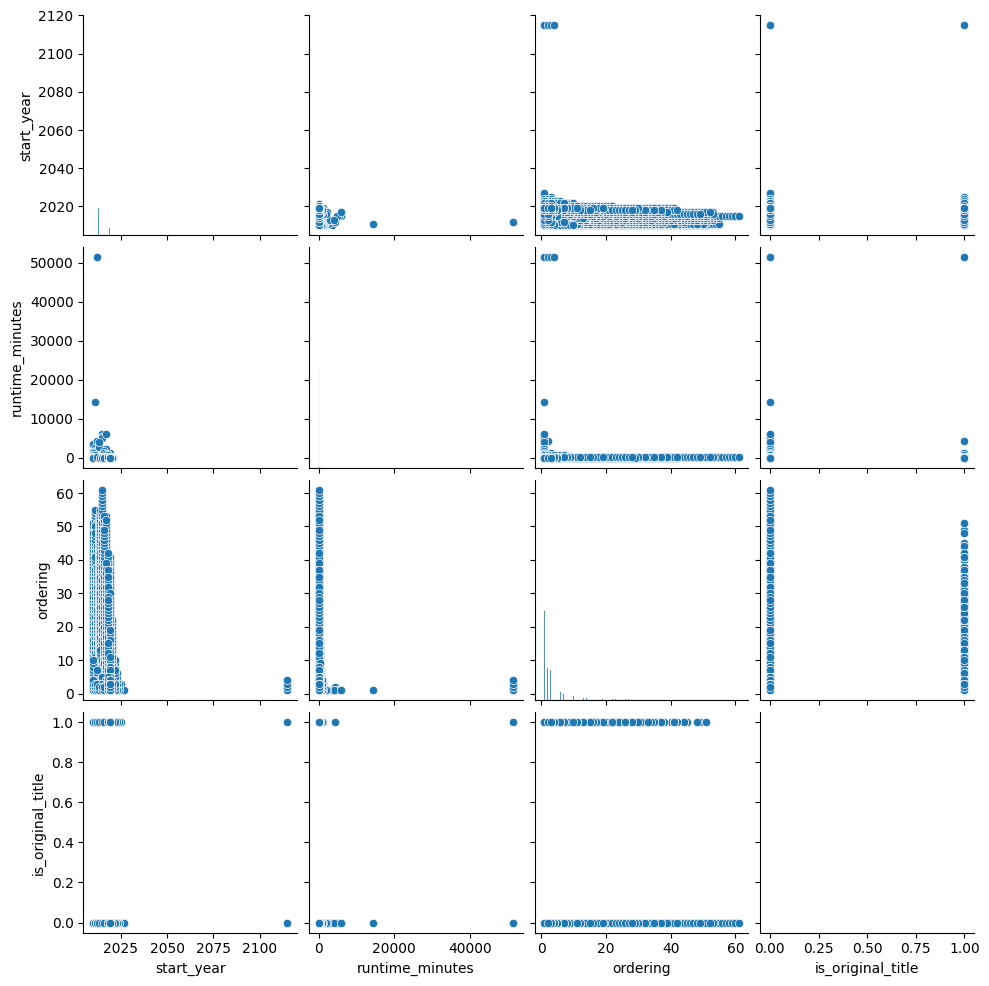

In [94]:
imdb_df_2 = pd.read_sql('''
SELECT * FROM movie_basics JOIN movie_akas USING(movie_id)
''',conn)

### quick scatterplot based on the data frame
sns.pairplot(data=imdb_df_2)
plt.show()

The scatter plot did not show genres since it is categorical data

In [15]:
# Connect to SQLite database
conn= sqlite3.connect(db_file_path)

# List tables
tables = pd.read_sql("""
                     SELECT name
                     FROM sqlite_master
                     WHERE type='table';
                     """, conn)
print("Tables in the IMDb database:")
print(tables)

Tables in the IMDb database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [16]:
# taking advantage of the fact that tables have movie index
# we combine all this data using the movie index

imdb_df = pd.read_sql('''
SELECT * FROM movie_basics JOIN movie_ratings USING(movie_id)
''', conn)

#### checking correlations between the movie ratings and movie basics

/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kimani/Desktop/moringa/phase2/finalProject/Movie-Insights/venv

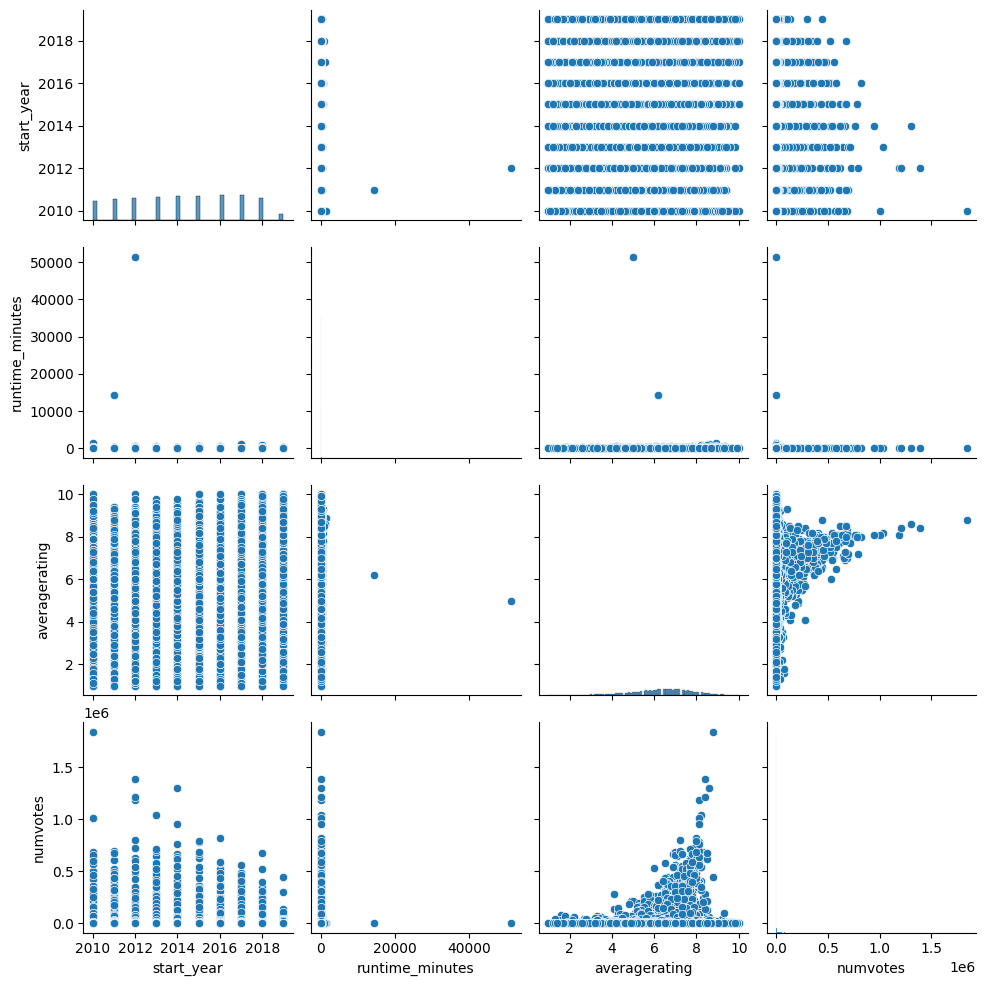

In [17]:
sns.pairplot(palette='cool',data=imdb_df)
plt.show()


Obvious correleation between the avaragerating and the number of votes. This variables are obviously not independent of each other.
The other data seems to have descrete continuations

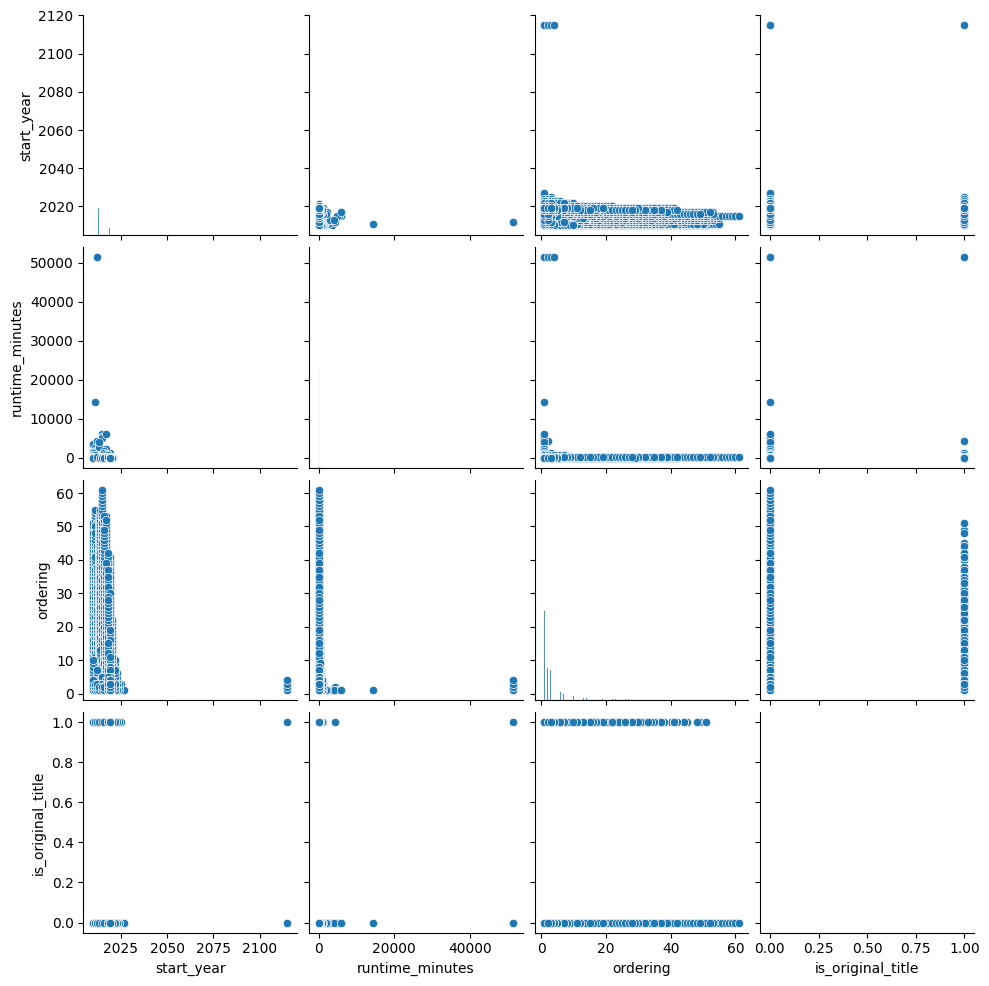

In [18]:
imdb_df_2 = pd.read_sql('''
SELECT * FROM movie_basics JOIN movie_akas USING(movie_id)
''',conn)

### quick scatterplot based on the data frame
sns.pairplot(data=imdb_df_2)
plt.show()

In [73]:
imdb_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   primary_title      331703 non-null  object 
 2   original_title     331690 non-null  object 
 3   start_year         331703 non-null  int64  
 4   runtime_minutes    300806 non-null  float64
 5   genres             327844 non-null  object 
 6   ordering           331703 non-null  int64  
 7   title              331703 non-null  object 
 8   region             278410 non-null  object 
 9   language           41715 non-null   object 
 10  types              168447 non-null  object 
 11  attributes         14925 non-null   object 
 12  is_original_title  331678 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 32.9+ MB


had to try , but essentially i see no obvious correlation between data from basics and movie akas

In [19]:
imdb_df_2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",5,Sungharsh,IN,hi,None,alternative spelling,0.0


In [20]:
# Isabllas trick for computing the percentage of null value in the 
# imdb data set

imdb_df.isnull().mean() * 100 # isnull will return the the same df but in terms
# of booleans that will say if value is null or not and the mean will see the average of null values
# and then * 100 to get percentage


movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

handling missing values in the runtime
genres missing values are harder to work with since they are
not continuous and so we leave it to God

In [21]:
runtime_median = imdb_df['runtime_minutes'].median()
imdb_df['runtime_minutes'].fillna(runtime_median, inplace=True)
imdb_df.dropna(subset=['genres'],inplace=True)
imdb_df.isna().sum()

/tmp/ipykernel_6625/2891729320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb_df['runtime_minutes'].fillna(runtime_median, inplace=True)


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

no null values